In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

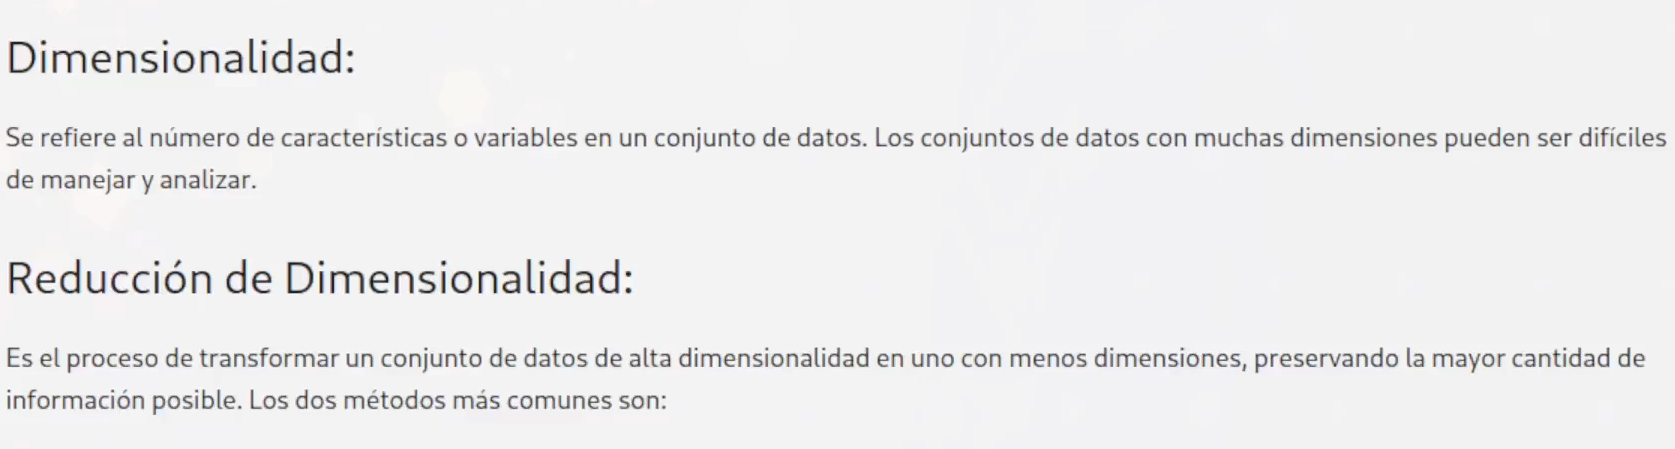

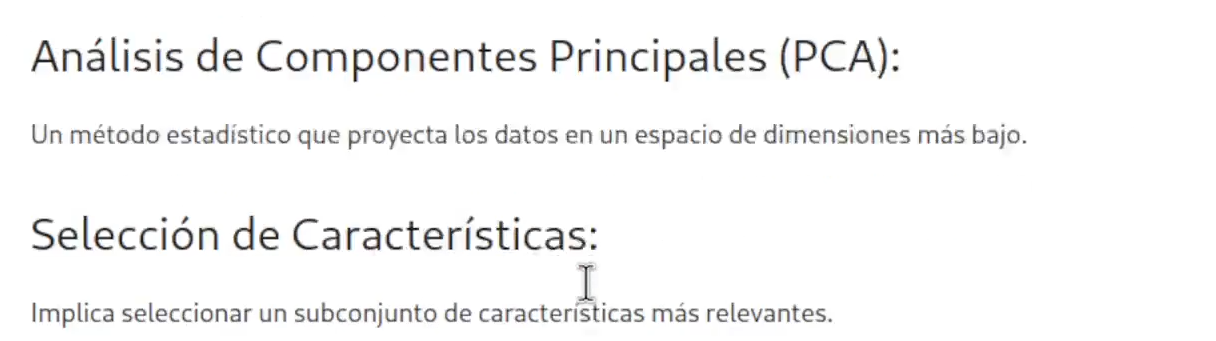

In [3]:
np.random.seed(42)
data = {
    'feature1': np.random.rand(10),
    'feature2': np.random.rand(10),
    'feature3': np.random.rand(10),
    'feature4': np.random.rand(10),
    'feature5': np.random.rand(10)
}
df = pd.DataFrame(data)
display(df)

,feature1,feature2,feature3,feature4,feature5
0,0.374540,0.020584,0.611853,0.607545,0.122038
1,0.950714,0.969910,0.139494,0.170524,0.495177
2,0.731994,0.832443,0.292145,0.065052,0.034389
3,0.598658,0.212339,0.366362,0.948886,0.909320
4,0.156019,0.181825,0.456070,0.965632,0.258780
5,0.155995,0.183405,0.785176,0.808397,0.662522
6,0.058084,0.304242,0.199674,0.304614,0.311711
7,0.866176,0.524756,0.514234,0.097672,0.520068
8,0.601115,0.431945,0.592415,0.684233,0.546710
9,0.708073,0.291229,0.046450,0.440152,0.184854


In [8]:
#reduccion de dimensionalidad con PSA
#normalizar datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [15]:
#Aplicacion de PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
display(df_pca)

,PC1,PC2
0,1.248333,-1.192094
1,-2.704439,1.014203
2,-2.371229,-0.804675
3,1.284276,1.741340
4,1.695832,-0.938603
5,2.377583,0.610852
6,0.100715,-1.339486
7,-1.146386,0.926520
8,0.567221,0.867118
9,-1.051906,-0.885175


In [17]:
print(f"Varianza explicada por componente: {pca.explained_variance_ratio_}")

Varianza explicada por componente: [0.54851505 0.23143335]


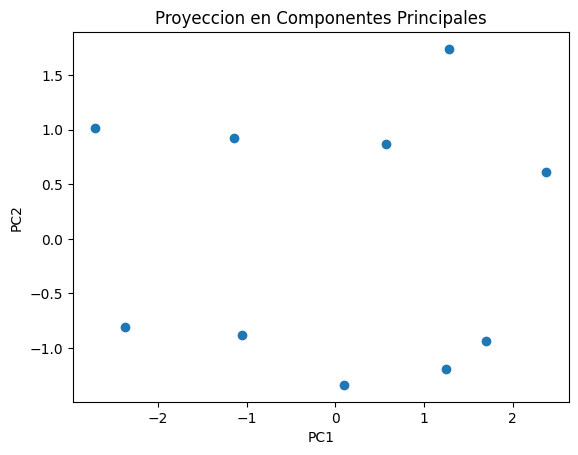

In [19]:
#visualizar datos
plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.title("Proyeccion en Componentes Principales")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [20]:
print(df.corr())

          feature1  feature2  feature3  feature4  feature5
feature1  1.000000  0.704285 -0.372964 -0.555227  0.069729
feature2  0.704285  1.000000 -0.450620 -0.736808 -0.092807
feature3 -0.372964 -0.450620  1.000000  0.464012  0.294302
feature4 -0.555227 -0.736808  0.464012  1.000000  0.419207
feature5  0.069729 -0.092807  0.294302  0.419207  1.000000


In [21]:
umbralcorrelacion = 0.7
correlacionabs = df.corr().abs()
eliminarcaracteristicas = set()

for i in range(len(correlacionabs.columns)):
    for j in range(i):
        if correlacionabs.iloc[i, j] > umbralcorrelacion:
            colname = correlacionabs.columns[i]
            eliminarcaracteristicas.add(colname)

print(f"Caracteristicas a eliminar por alta correlacion: {eliminarcaracteristicas}")

df_reducido = df.drop(columns=eliminarcaracteristicas)
display(df_reducido)

Caracteristicas a eliminar por alta correlacion: {'feature2', 'feature4'}


,feature1,feature3,feature5
0,0.374540,0.611853,0.122038
1,0.950714,0.139494,0.495177
2,0.731994,0.292145,0.034389
3,0.598658,0.366362,0.909320
4,0.156019,0.456070,0.258780
5,0.155995,0.785176,0.662522
6,0.058084,0.199674,0.311711
7,0.866176,0.514234,0.520068
8,0.601115,0.592415,0.546710
9,0.708073,0.046450,0.184854
